<a href="https://colab.research.google.com/github/theprashasst/YogaFix/blob/main/Model%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install numpy pandas torch opencv-python wnb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00


In [ ]:
!pip install wnb

  Using cached wnb-0.8.0-py3-none-any.whl.metadata (8.1 kB)
Using cached wnb-0.8.0-py3-none-any.whl (22 kB)


In [ ]:
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np

import wandb



In [ ]:
df=pd.read_csv("/content/pose_landmarks_data_labeled.csv")
# df['pose_label'] = df['pose_label'].str.replace('_2', '', regex=False)


In [ ]:
# Get unique class names and mappings
class_names=df.pose_label
unique_classes = df.pose_label.unique()
class_to_index = {name: idx for idx, name in enumerate(unique_classes)}
index_to_class = {idx: name for name, idx in class_to_index.items()}

# Numeric label column
df['class_no'] = class_names.map(class_to_index)

# Extract X (features), y (one-hot), and numeric class mapping
X = df.drop(columns=['pose_label'])
# X = df.drop(columns=['pose_label'])
X= X.drop(columns=['class_no'])
y = pd.get_dummies(class_names).astype(int)


In [ ]:
index_to_class

{0: 'pranamasana',
 1: 'hasta_uttanasana',
 2: 'padahastasana_fold',
 3: 'ashwa_sanchalanasana_R_leg_back',
 4: 'dandasana_plank',
 5: 'ashtanga_namaskara_eight_limbs',
 6: 'bhujangasana_cobra',
 7: 'adho_mukha_svanasana_down_dog',
 8: 'ashwa_sanchalanasana_L_leg_back'}

In [ ]:
X.shape

(711, 132)

In [ ]:
print(X.columns.tolist())


['lm_0_x', 'lm_0_y', 'lm_0_z', 'lm_0_vis', 'lm_1_x', 'lm_1_y', 'lm_1_z', 'lm_1_vis', 'lm_2_x', 'lm_2_y', 'lm_2_z', 'lm_2_vis', 'lm_3_x', 'lm_3_y', 'lm_3_z', 'lm_3_vis', 'lm_4_x', 'lm_4_y', 'lm_4_z', 'lm_4_vis', 'lm_5_x', 'lm_5_y', 'lm_5_z', 'lm_5_vis', 'lm_6_x', 'lm_6_y', 'lm_6_z', 'lm_6_vis', 'lm_7_x', 'lm_7_y', 'lm_7_z', 'lm_7_vis', 'lm_8_x', 'lm_8_y', 'lm_8_z', 'lm_8_vis', 'lm_9_x', 'lm_9_y', 'lm_9_z', 'lm_9_vis', 'lm_10_x', 'lm_10_y', 'lm_10_z', 'lm_10_vis', 'lm_11_x', 'lm_11_y', 'lm_11_z', 'lm_11_vis', 'lm_12_x', 'lm_12_y', 'lm_12_z', 'lm_12_vis', 'lm_13_x', 'lm_13_y', 'lm_13_z', 'lm_13_vis', 'lm_14_x', 'lm_14_y', 'lm_14_z', 'lm_14_vis', 'lm_15_x', 'lm_15_y', 'lm_15_z', 'lm_15_vis', 'lm_16_x', 'lm_16_y', 'lm_16_z', 'lm_16_vis', 'lm_17_x', 'lm_17_y', 'lm_17_z', 'lm_17_vis', 'lm_18_x', 'lm_18_y', 'lm_18_z', 'lm_18_vis', 'lm_19_x', 'lm_19_y', 'lm_19_z', 'lm_19_vis', 'lm_20_x', 'lm_20_y', 'lm_20_z', 'lm_20_vis', 'lm_21_x', 'lm_21_y', 'lm_21_z', 'lm_21_vis', 'lm_22_x', 'lm_22_y', 'lm_2

In [ ]:


# Separate landmarks (X) and class labels (y)
X = df.drop(columns=['pose_label'])  # Drop the pose_label column to get the landmarks
class_names = df['pose_label']  # Extract the class label (pose_label)
y = pd.get_dummies(class_names).astype(int)  # Convert to one-hot encoding and cast to int

In [ ]:
y


,adho_mukha_svanasana_down_dog,ashtanga_namaskara_eight_limbs,ashwa_sanchalanasana_L_leg_back,ashwa_sanchalanasana_R_leg_back,bhujangasana_cobra,dandasana_plank,hasta_uttanasana,padahastasana_fold,pranamasana
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
706,0,0,1,0,0,0,0,0,0
707,0,0,1,0,0,0,0,0,0
708,0,0,1,0,0,0,0,0,0
709,0,0,1,0,0,0,0,0,0


In [ ]:
df_onehot = pd.get_dummies(df['pose_label']).astype(int)
class_names = df.pop('pose_label').unique()
df = df.drop("pose_label", axis=1)
df = pd.concat([df, df_onehot], axis=1)


In [ ]:
df

,lm_0_x,lm_0_y,lm_0_z,lm_0_vis,lm_1_x,lm_1_y,lm_1_z,lm_1_vis,lm_2_x,lm_2_y,...,lm_30_vis,lm_31_x,lm_31_y,lm_31_z,lm_31_vis,lm_32_x,lm_32_y,lm_32_z,lm_32_vis,pose_label
0,0.474155,0.290059,-0.162908,0.999965,0.478606,0.277477,-0.155448,0.999929,0.481032,0.277486,...,0.886386,0.496552,0.795165,0.088062,0.962782,0.453065,0.806654,0.043338,0.976760,pranamasana
1,0.466583,0.300781,-0.177525,0.999919,0.470709,0.287244,-0.168152,0.999850,0.473059,0.286765,...,0.849914,0.499485,0.801637,0.064510,0.959549,0.451001,0.806090,0.052104,0.972101,pranamasana
2,0.465730,0.299038,-0.104304,0.999749,0.469146,0.285445,-0.094034,0.999557,0.471540,0.285161,...,0.827662,0.497946,0.799523,0.063764,0.958841,0.450583,0.809887,0.029240,0.967937,pranamasana
3,0.473353,0.307978,-0.139390,0.999879,0.477164,0.295563,-0.127273,0.999809,0.479074,0.295449,...,0.880923,0.517552,0.786150,0.061063,0.971229,0.455281,0.800772,0.030397,0.980167,pranamasana
4,0.446647,0.306514,-0.063009,0.999948,0.449468,0.295600,-0.046920,0.999931,0.451787,0.295602,...,0.729094,0.490387,0.800955,0.009007,0.935212,0.445681,0.808367,0.008666,0.938949,hasta_uttanasana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,0.703436,0.397005,-0.084728,0.999942,0.715052,0.383695,-0.065890,0.999938,0.715183,0.382815,...,0.991201,0.196148,0.814143,0.193061,0.997655,0.705142,0.757020,0.029536,0.995279,ashwa_sanchalanasana_L_leg_back
707,0.705540,0.397649,-0.111790,0.999960,0.717511,0.385563,-0.090484,0.999958,0.717601,0.385323,...,0.990298,0.200324,0.814960,0.200956,0.997516,0.705987,0.757059,0.042427,0.994891,ashwa_sanchalanasana_L_leg_back
708,0.705819,0.397174,-0.116079,0.999968,0.717796,0.385470,-0.096023,0.999966,0.717942,0.385311,...,0.990813,0.200148,0.817075,0.168552,0.997560,0.705563,0.759802,0.011933,0.995142,ashwa_sanchalanasana_L_leg_back
709,0.706060,0.395871,-0.083963,0.999972,0.718004,0.383351,-0.068654,0.999970,0.718176,0.382698,...,0.991742,0.202494,0.813790,0.193486,0.997741,0.704812,0.756196,0.009579,0.995628,ashwa_sanchalanasana_L_leg_back


In [ ]:
df.head()

,lm_0_x,lm_0_y,lm_0_z,lm_0_vis,lm_1_x,lm_1_y,lm_1_z,lm_1_vis,lm_2_x,lm_2_y,...,lm_32_vis,adho_mukha_svanasana_down_dog,ashtanga_namaskara_eight_limbs,ashwa_sanchalanasana_L_leg_back,ashwa_sanchalanasana_R_leg_back,bhujangasana_cobra,dandasana_plank,hasta_uttanasana,padahastasana_fold,pranamasana
0,0.474155,0.290059,-0.162908,0.999965,0.478606,0.277477,-0.155448,0.999929,0.481032,0.277486,...,0.976760,0,0,0,0,0,0,0,0,1
1,0.466583,0.300781,-0.177525,0.999919,0.470709,0.287244,-0.168152,0.999850,0.473059,0.286765,...,0.972101,0,0,0,0,0,0,0,0,1
2,0.465730,0.299038,-0.104304,0.999749,0.469146,0.285445,-0.094034,0.999557,0.471540,0.285161,...,0.967937,0,0,0,0,0,0,0,0,1
3,0.473353,0.307978,-0.139390,0.999879,0.477164,0.295563,-0.127273,0.999809,0.479074,0.295449,...,0.980167,0,0,0,0,0,0,0,0,1
4,0.446647,0.306514,-0.063009,0.999948,0.449468,0.295600,-0.046920,0.999931,0.451787,0.295602,...,0.938949,0,0,0,0,0,0,1,0,0


In [ ]:

processed_X_train = pd.read_csv('processed_train_X_data.csv')
y = pd.read_csv('processed_train_y_data.csv')
class_names = pd.read_csv('processed_train_class_names.csv')




9

In [ ]:
# Hyperparameters
num_classes = len(class_names.pose_label.unique())
batch_size = 16
num_epochs = 15
learning_rate = 0.001

In [ ]:
# Login once per machine
wandb.login()

# Initialize the run
wandb.init(project="pose-check", config={
    "epochs": num_epochs,
    "batch_size": batch_size,
    "learning_rate": learning_rate,
    "architecture": "Conv1D_PoseCheck"
})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: prashasst (prashasst-ai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:


# Track metrics manually during training
train_losses = []
train_accuracies = []

fc1_weights = []          # append(model.fc1.weight.detach().cpu().numpy().copy())
conv1_weights = []        # append(model.conv1.weight.detach().cpu().numpy().copy())
conv2_weights = []        # same
conv3_weights = []        # same

In [ ]:
class PoseCheck(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        # First convolutional block
        self.conv1 = nn.Conv1d(4, 32, kernel_size=3, padding=1)  # Conv1d with padding to keep sequence length
        self.bn1 = nn.BatchNorm1d(32)  # Batch Normalization
        self.relu = nn.ReLU()  # ReLU activation
        self.pool = nn.MaxPool1d(2)  # Max pooling to reduce sequence length

        # Second convolutional block
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)  # Increase depth to 64 filters
        self.bn2 = nn.BatchNorm1d(64)  # Batch Normalization

        # Third convolutional block
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)  # Increase depth to 128 filters
        self.bn3 = nn.BatchNorm1d(128)  # Batch Normalization

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4, 256)  # Linear layer after flattening
        self.fc2 = nn.Linear(256, num_classes)  # Output layer for classification

        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Reshape x from [batch_size, 99] to [batch_size, 3, 33]
        x = x.view(x.size(0), 4, 33)  # [batch_size, 3, 33]

        # First convolutional block
        x = self.relu(self.bn1(self.conv1(x)))  # [batch_size, 32, 33]
        x = self.pool(x)  # [batch_size, 32, 16]

        # Second convolutional block
        x = self.relu(self.bn2(self.conv2(x)))  # [batch_size, 64, 16]
        x = self.pool(x)  # [batch_size, 64, 8]

        # Third convolutional block
        x = self.relu(self.bn3(self.conv3(x)))  # [batch_size, 128, 8]
        x = self.pool(x)  # [batch_size, 128, 4]

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer: [batch_size, 128*4] = [batch_size, 512]

        # First fully connected layer
        x = self.relu(self.fc1(x))  # [batch_size, 256]
        x = self.dropout(x)  # Apply dropout

        # Output layer
        x = self.fc2(x)  # [batch_size, num_classes]

        return x


In [ ]:

# Define your dataset class
class LandmarkDataset(Dataset):
    def __init__(self, landmarks, labels):
        """
        landmarks: list of flattened landmarks, shape (N, 99) where N is the number of samples
        labels: list of labels, shape (N,) where N is the number of samples
        """
        self.landmarks = landmarks
        self.labels = labels

    def __len__(self):
        return len(self.landmarks)

    def __getitem__(self, idx):
        x = torch.tensor(self.landmarks[idx], dtype=torch.float32)  # Shape (99,)
        y = torch.tensor(int(self.labels[idx]), dtype=torch.long)  # Shape (num_classes,)
        return x, y

# Create the model
model = PoseCheck(num_classes=10)  # Example with 10 classes, adjust based on your task

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
X_np = processed_X_train.to_numpy(dtype=np.float32)
y_np = y.to_numpy(dtype=np.float32)
y_np=y_np.reshape(711)


#
landmarks = X_np  # Replace with actual data (100 samples, 99 flattened points)
labels = y_np # Example labels, replace with actual labels

# Create the dataset and data loader
dataset = LandmarkDataset(landmarks, labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  # Adjust batch_size based on available memory


In [ ]:
# X_np.shape
y_np.shape

(711,)

In [ ]:

# Training loop



for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        # Reshape inputs to match model input format: [batch_size, 3, 33]
        inputs = inputs.view(inputs.size(0), 4, 33)  # [batch_size, 3, 33]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)  # Output shape: [batch_size, num_classes]

        # Compute the loss
        loss = criterion(outputs, targets)
        running_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # Track loss and accuracy per epoch
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)  # Compute accuracy manually if needed

    # Track weights for change visualization
    fc1_weights.append(model.fc1.weight.detach().cpu().numpy().copy())
    conv1_weights.append(model.conv1.weight.detach().cpu().numpy().copy())
    conv2_weights.append(model.conv2.weight.detach().cpu().numpy().copy())
    conv3_weights.append(model.conv3.weight.detach().cpu().numpy().copy())

# After training, you can evaluate the model on the validation/test set


Epoch [1/15], Loss: 1.0549, Accuracy: 67.09%
Epoch [2/15], Loss: 0.2655, Accuracy: 91.84%
Epoch [3/15], Loss: 0.1491, Accuracy: 96.20%
Epoch [4/15], Loss: 0.1278, Accuracy: 95.92%
Epoch [5/15], Loss: 0.1079, Accuracy: 97.61%
Epoch [6/15], Loss: 0.0693, Accuracy: 98.87%
Epoch [7/15], Loss: 0.0857, Accuracy: 97.47%
Epoch [8/15], Loss: 0.0815, Accuracy: 98.17%
Epoch [9/15], Loss: 0.0558, Accuracy: 98.59%
Epoch [10/15], Loss: 0.0480, Accuracy: 98.31%
Epoch [11/15], Loss: 0.0478, Accuracy: 98.87%
Epoch [12/15], Loss: 0.0323, Accuracy: 99.44%
Epoch [13/15], Loss: 0.0267, Accuracy: 99.44%
Epoch [14/15], Loss: 0.0215, Accuracy: 99.44%
Epoch [15/15], Loss: 0.0291, Accuracy: 99.02%


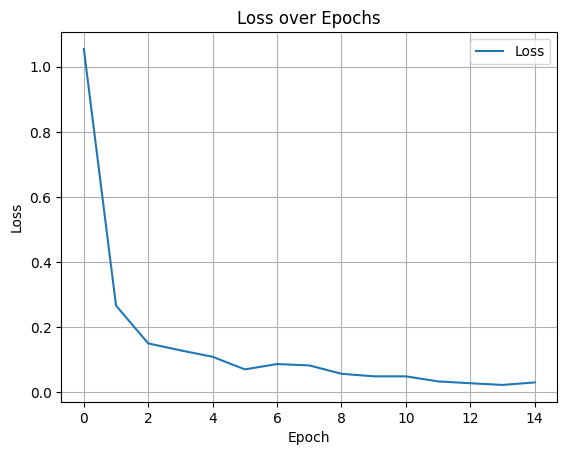

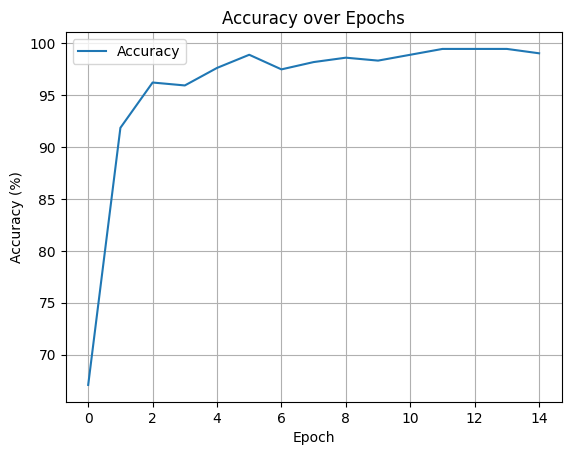

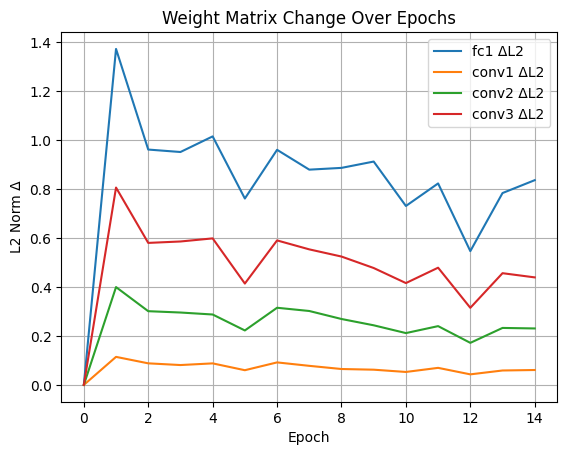

In [ ]:
# 1. Loss Plot
plt.figure()
plt.plot(train_losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.legend()
plt.savefig("loss_plot.png")

# 2. Accuracy Plot
plt.figure()
plt.plot(train_accuracies, label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy over Epochs")
plt.grid(True)
plt.legend()
plt.savefig("accuracy_plot.png")

# 3. Weight Change (L2 Norm) Plots for fc1 and conv layers
def compute_l2_deltas(weight_list):
    return [0] + [np.linalg.norm(weight_list[i] - weight_list[i-1]) for i in range(1, len(weight_list))]

fc1_deltas = compute_l2_deltas(fc1_weights)
conv1_deltas = compute_l2_deltas(conv1_weights)
conv2_deltas = compute_l2_deltas(conv2_weights)
conv3_deltas = compute_l2_deltas(conv3_weights)

plt.figure()
plt.plot(fc1_deltas, label="fc1 ΔL2")
plt.plot(conv1_deltas, label="conv1 ΔL2")
plt.plot(conv2_deltas, label="conv2 ΔL2")
plt.plot(conv3_deltas, label="conv3 ΔL2")
plt.xlabel("Epoch")
plt.ylabel("L2 Norm Δ")
plt.title("Weight Matrix Change Over Epochs")
plt.legend()
plt.grid(True)
plt.savefig("weight_change_over_epochs.png")



In [ ]:
torch.save(model.state_dict(), 'final_model_weights.pth')
